# Weather1
Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
## Observable Trends and Insights
1. The findings of these analysis showed that there is a higher temperature for cities that found near to the equator (Latitude 0), however, when we go farther from the equator towards the north the temperature decreases highly. However, when we go to the south the temperature decreases but it is much lower comparing to the north. The regression analysis and plot also showed that there is a strong negative correlation between temperature, and latitude in the northern hemisphere however, the correlation between temperature and latitude in the south Hemisphere is negative but very week to conclude.
2. The findings from the data, plots, and the regression line in the case of testing if there is a relation between humidity and cloudiness of cities nearer or farther to the equator (latitude 0) doesn't show any significant results. The correlation between humidity and latitude for both northern and southern hemisphere cities is very week, negative correlation, and the result for cloudiness and latitude also very week and negative. Therefore, We can infer that humidity can be fairly distributed in both northern and southern hemisphere cities regardless of their distance from the equator.
3. The finding from the analysis of the relationship between wind speed (mph), and latitude showed that the lower wind speed when the cities closer to the equater (latitude 0), and somehow the wind speed increase for the cities farther from the equater. The regression analysis also showed that there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

# Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [41]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
        

In [42]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | coahuayana
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | dubbo
Processing Record 5 of Set 1 | marrakesh
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | ambilobe
Processing Record 10 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | shurugwi
Processing Record 14 of Set 1 | berlevag
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | roblin
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | sorong
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | bambous vi

Processing Record 37 of Set 4 | arman
Processing Record 38 of Set 4 | bathsheba
Processing Record 39 of Set 4 | launceston
Processing Record 40 of Set 4 | amalapuram
Processing Record 41 of Set 4 | jungapeo
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | clyde river
Processing Record 44 of Set 4 | broken hill
Processing Record 45 of Set 4 | dalvik
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | galveston
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | alpena
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | maxixe
Processing Record 4 of Set 5 | machilipatnam
Processing Record 5 of Set 5 | dinsor
City not found. Skipping...
Processing Record 6 of Set 5 | geresk
City not found. Skipping...
Processing Record 7 of Set 5 | svetlyy
Processing Record 8 of Set 5 | kralendijk
Processing Record 

Processing Record 24 of Set 8 | cockburn town
Processing Record 25 of Set 8 | dicabisagan
Processing Record 26 of Set 8 | yelizovo
Processing Record 27 of Set 8 | matongo
Processing Record 28 of Set 8 | ponta delgada
Processing Record 29 of Set 8 | abu samrah
Processing Record 30 of Set 8 | geraldton
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | ambanja
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | zhirnovsk
Processing Record 35 of Set 8 | udachnyy
Processing Record 36 of Set 8 | terre-de-bas
Processing Record 37 of Set 8 | big spring
Processing Record 38 of Set 8 | iqaluit
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | sulangan
Processing Record 41 of Set 8 | mangrol
Processing Record 42 of Set 8 | vallenar
Processing Record 43 of Set 8 | narasannapeta
Processing Record 44 of Set 8 | wahran
City not found. Skipping...
Processing Record 45 of Set 8 | winnemucca
Processing Record 46 of Set 8 | lagoa
Processing Record 4

Processing Record 16 of Set 12 | nabire
Processing Record 17 of Set 12 | huari
Processing Record 18 of Set 12 | ust-kuyga
Processing Record 19 of Set 12 | mogadishu
Processing Record 20 of Set 12 | cayenne
Processing Record 21 of Set 12 | oxford
Processing Record 22 of Set 12 | seoul
Processing Record 23 of Set 12 | gilgit
Processing Record 24 of Set 12 | lewisporte
Processing Record 25 of Set 12 | angoche
Processing Record 26 of Set 12 | kargat
Processing Record 27 of Set 12 | abonnema
Processing Record 28 of Set 12 | kerman
Processing Record 29 of Set 12 | bolitoc
Processing Record 30 of Set 12 | kaeo
Processing Record 31 of Set 12 | simao
Processing Record 32 of Set 12 | molina
Processing Record 33 of Set 12 | damghan
Processing Record 34 of Set 12 | burleson
Processing Record 35 of Set 12 | matsanga
City not found. Skipping...
Processing Record 36 of Set 12 | quincy
Processing Record 37 of Set 12 | beian
Processing Record 38 of Set 12 | murakami
Processing Record 39 of Set 12 | pue

In [43]:
# Length of Latitude and Temprature

len(lat)
len(temp)

597

# Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [44]:
 # Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          550
Lat           550
lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64


In [45]:
# Export the city data into a .csv file.
city_weather_df.to_csv("../output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("../output_data/city_weather_data.csv")
weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coahuayana,18.7333,-103.6833,87.04,45.0,30.0,4.94,MX,1.678901e+09
1,saskylakh,71.9167,114.0833,16.32,92.0,100.0,8.28,RU,1.678901e+09
2,ancud,-41.8697,-73.8203,57.06,52.0,12.0,4.50,CL,1.678901e+09
3,dubbo,-32.2500,148.6167,59.13,88.0,6.0,3.44,AU,1.678901e+09
4,marrakesh,31.6315,-8.0083,89.67,17.0,0.0,6.91,MA,1.678901e+09


# Inspect the data and remove the cities where the humidity > 100%.

This section is skiped Because no cities that have humidity > 100%.

## Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

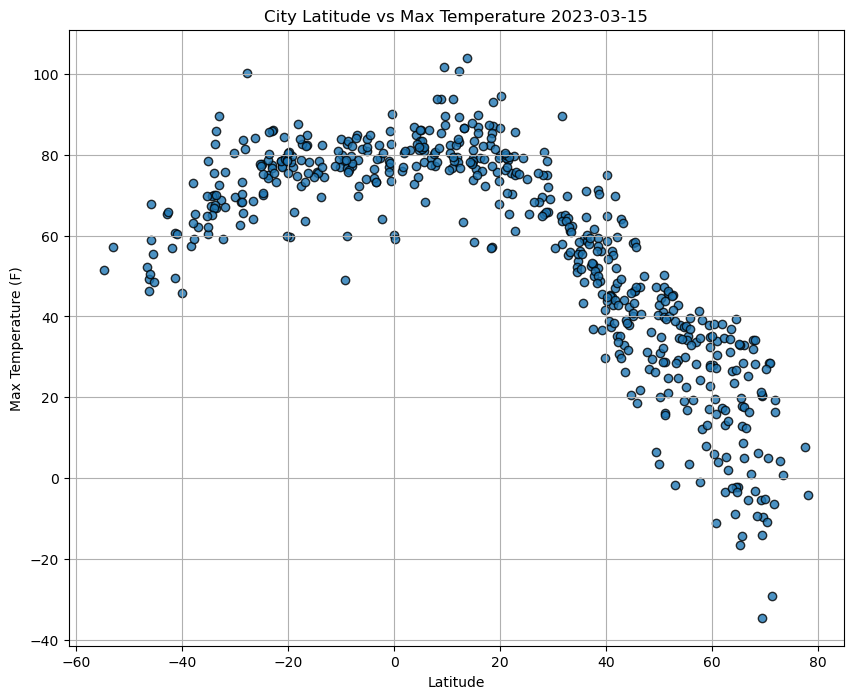

In [46]:
date_time = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("../output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above scatter plot showcase the relationship between Latitude at x-axis vs Max Temperature (F) at the y-axis. This result indicates that there is a higher temrature for the cities that found near to the equater (Latitude 0),however when you go farther from the equator towrads to the north and soutt the temprature will decrease.


# Latitude vs. Humidity Plot
 

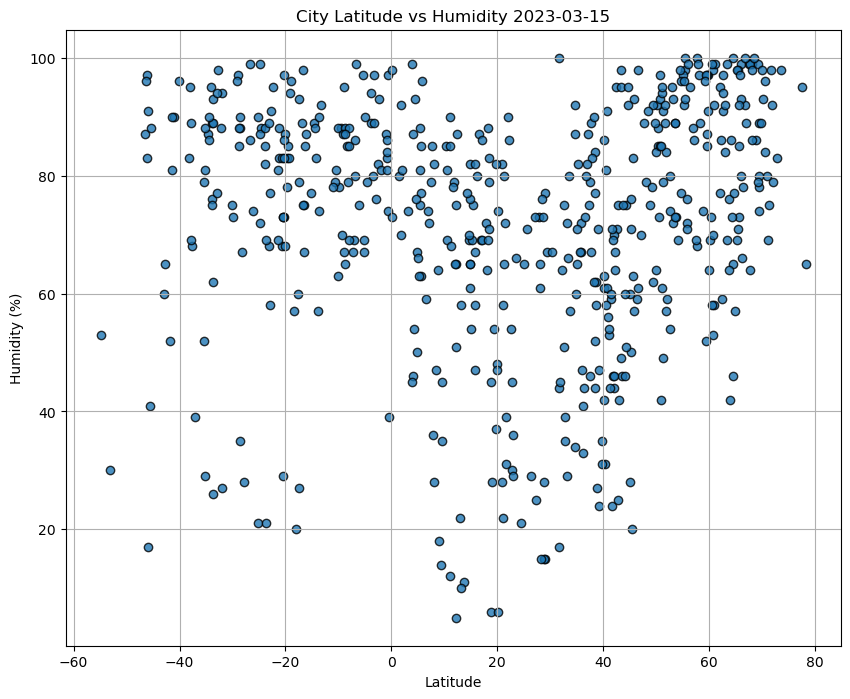

In [47]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above scatter plot displayed the relationship between Humidity (%) vs. Latitude.From the result we can infer that humidity is fairly distributed troughout the plot, so we can say that high humidity occer for both cities found farther or near to the equator.


# Latitude vs. Cloudiness Plot

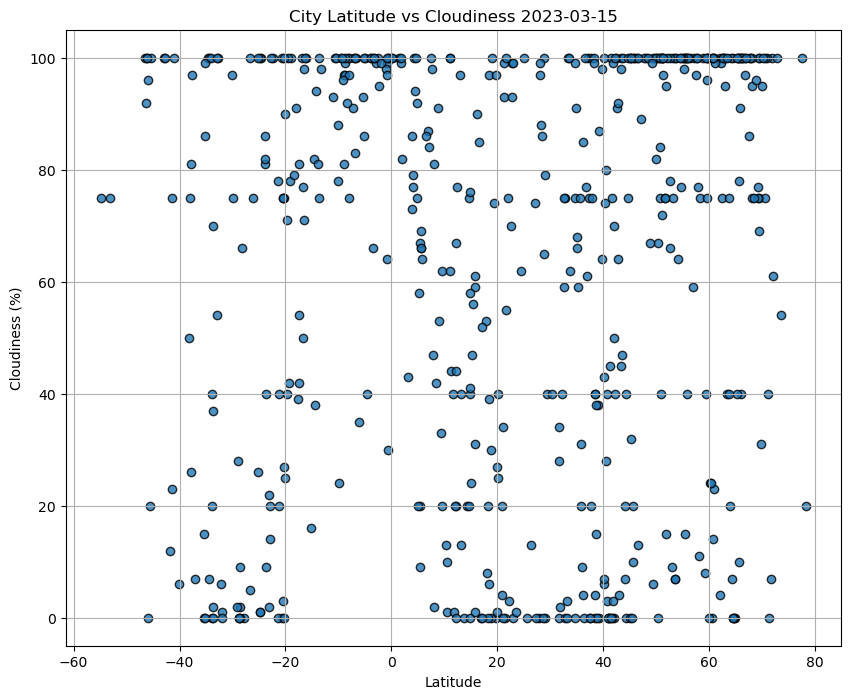

In [48]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()


The above scatter plot showed the relationship between the cities cloudness, and latitude. From this result we can tell that the data is evenly distributed, and there is no difference in Cloudiness when the cities farther or nearer to the equater(Latitude 0).


# Latitude vs. Wind Speed Plot 

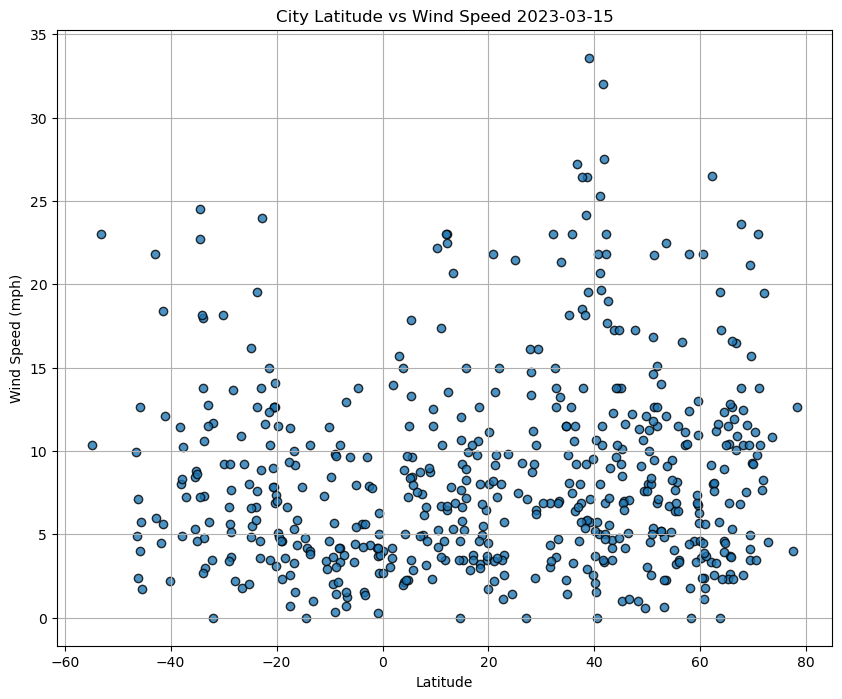

In [49]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("../output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above scatter plot showed the relationship between wind speed (mph), and latitude. The plot displayed the lower wind speed when the cities closer to the equater (latitude 0) and somehow the wind speed increase for the cities farther from the equater.


# Linear Regression

In [50]:
# OPTIONAL: Create a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [51]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8057226933828555
The correlation between both factors is -0.9


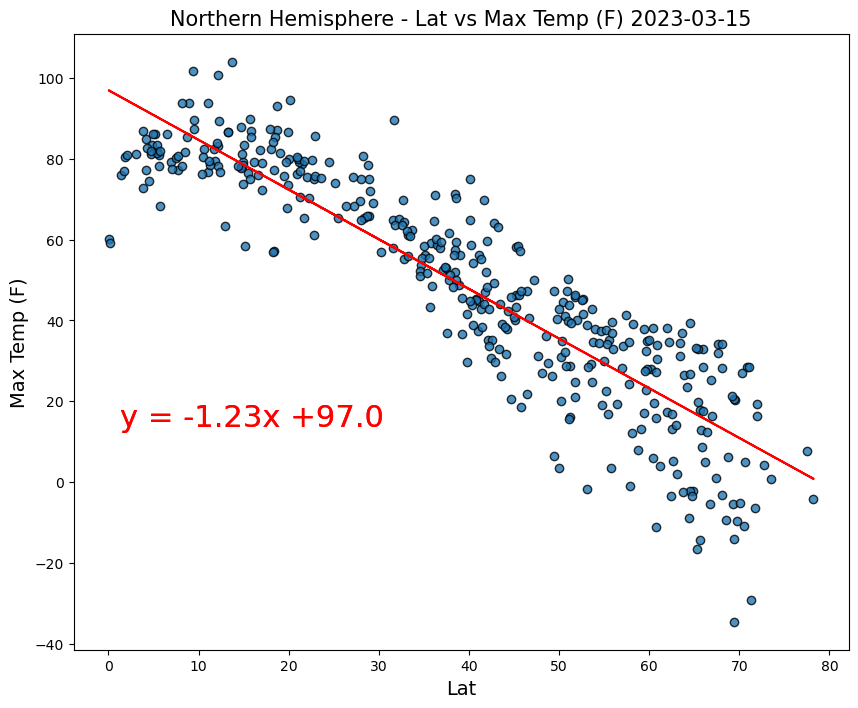

In [52]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("../output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Maximum tempreture and latitude for Northern Hemisphere cities. The result from the data showed that there is a strong, negative correlation between Maximum tempreture and latitude. These means when we go farther away from the equater(latitude 0) the maximum Temperature (F) will decrease.


# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.10988388049185809
The correlation between both factors is 0.33


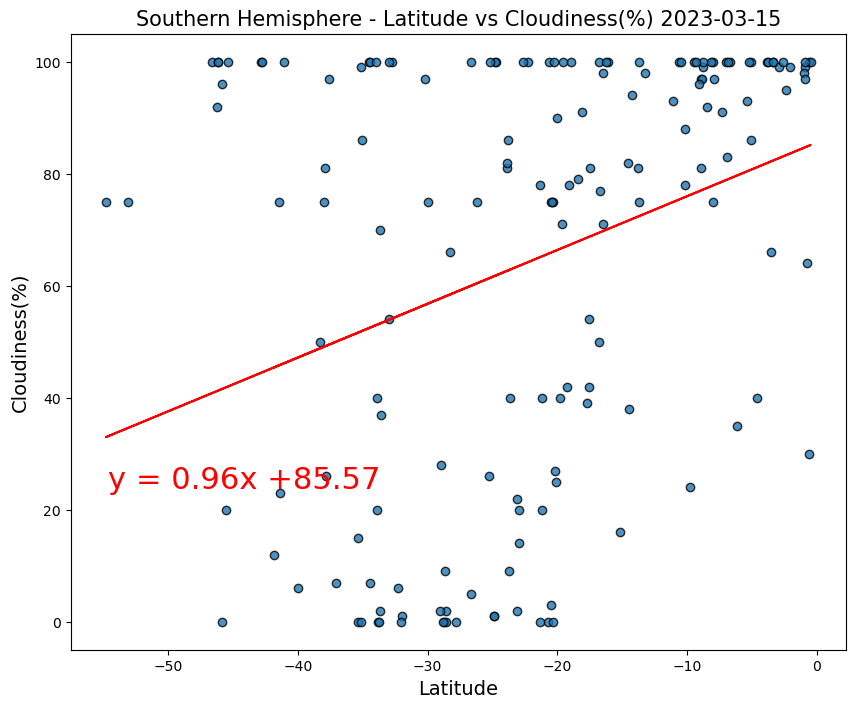

In [53]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("../output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Maximum tempreture and latitude for Southern Hemisphere cities. The result from the data showed that there is a very week almost none negative correlation between Maximum Tempreture and latitude in the Southern Hemisphere cities.


# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1368521438407282
The correlation between both factors is 0.37


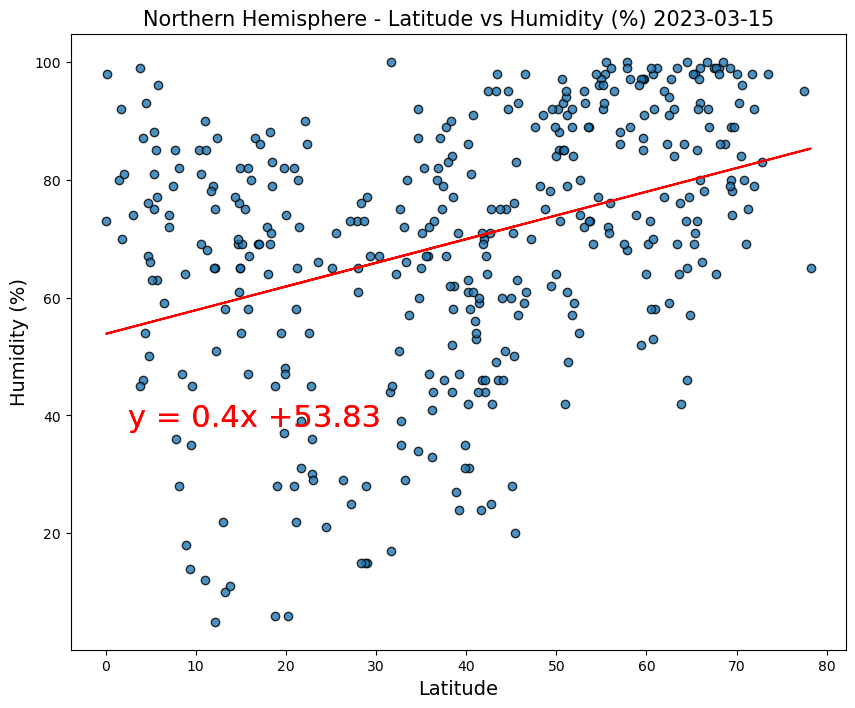

In [54]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("../output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Humidity (%) and Latitude for Northern Hemisphere cities. The result from the data showed that there is a very week negative correlation between Humidity (%) and Latitude in the Northern Hemisphere cities.


# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1368521438407282
The correlation between both factors is 0.37


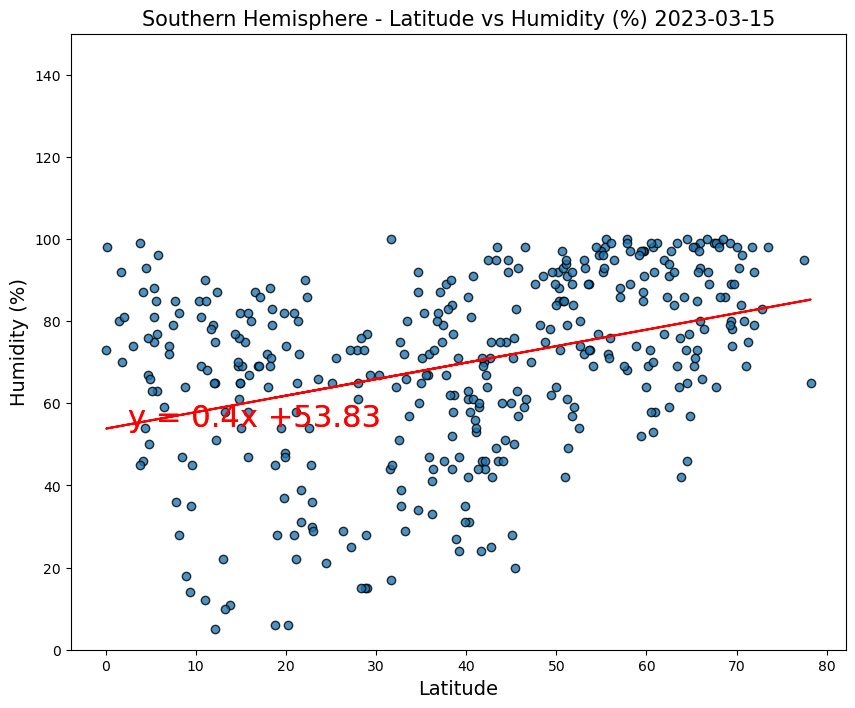

In [55]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("../output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Humidity (%) and Latitude for Southern Hemisphere cities. The result from the data showed that there is a very week, almost none negative correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.


# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04323448769763153
The correlation between both factors is 0.21


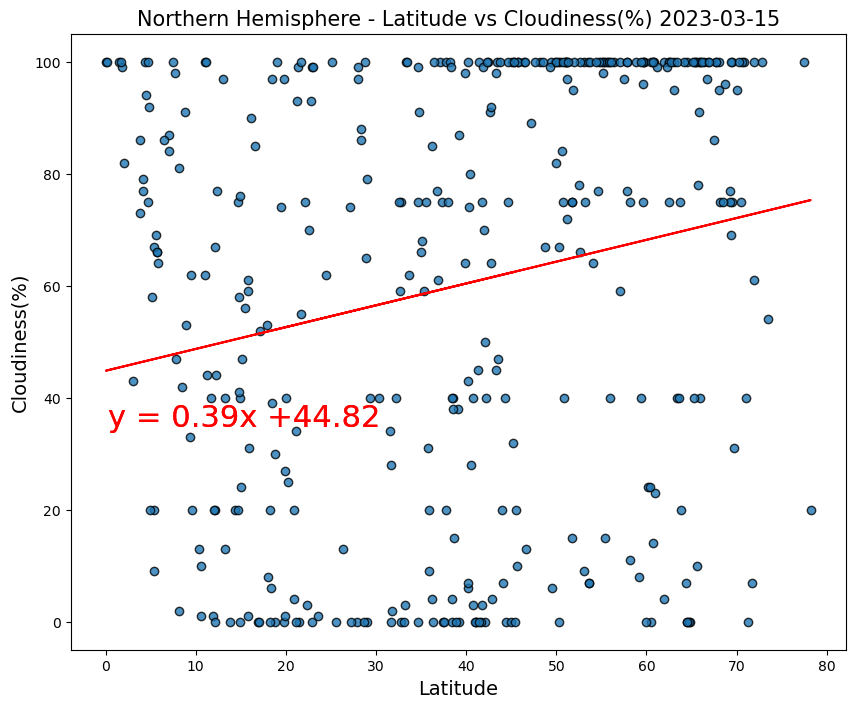

In [56]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("../output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Cloudiness (%) and for Southern Hemisphere cities. The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.


# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0032480196503848024
The correlation between both factors is 0.06


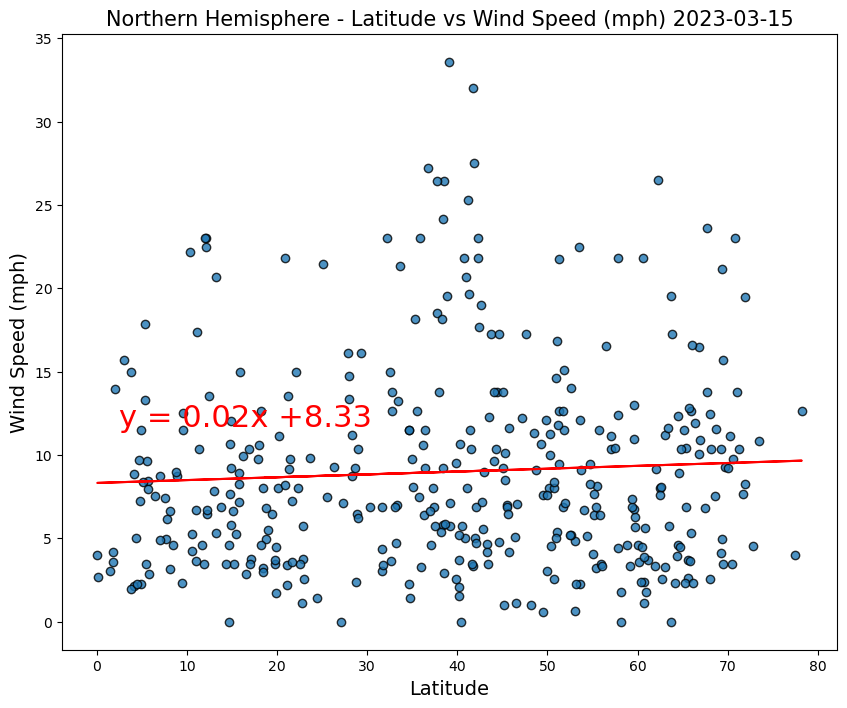

In [57]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("../output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Wind Speed (mph), and latitude for Northern_Hemisphere cities. The result from the data showed that there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.


# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1086213991960469
The correlation between both factors is -0.33


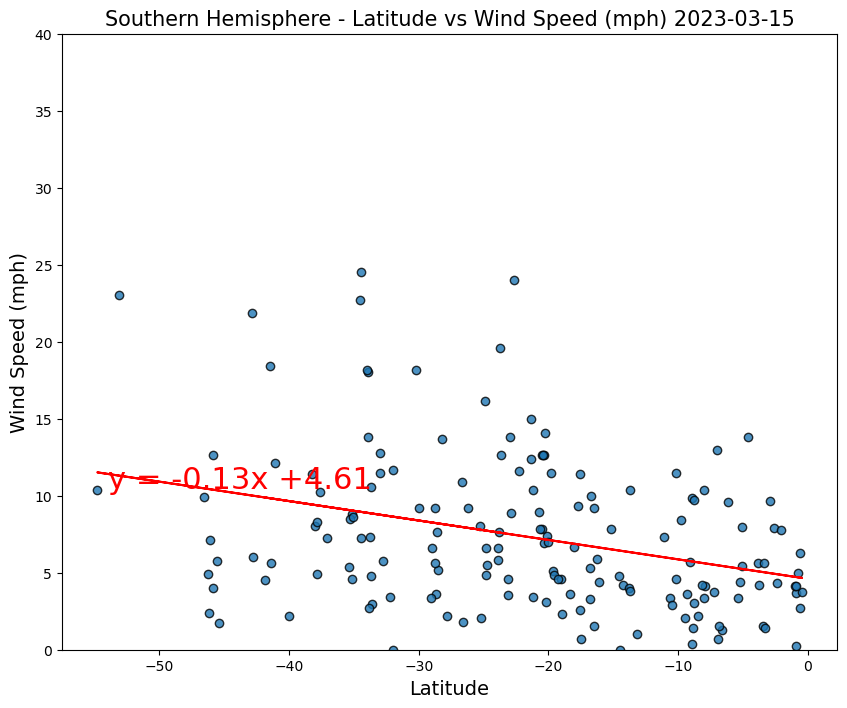

In [58]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("../output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

The above plot is a linear regression model between Wind Speed (mph), and latitude for Southern Hemisphere. The result from the data showed that there is a very week, negative correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.